In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import pprint as pprint
from math import sqrt
from scipy.stats import linregress
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
athletes = pd.read_csv('./summerOly_athletes.csv')
athletes.head()

,Name,Sex,Team,NOC,Year,City,Sport,Event,Medal
0,A Dijiang,M,China,CHN,1992,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,A Lamusi,M,China,CHN,2012,London,Judo,Judo Men's Extra-Lightweight,No medal
2,Gunnar Aaby,M,Denmark,DEN,1920,Antwerpen,Football,Football Men's Football,No medal
3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Cornelia (-strannood),F,Netherlands,NED,1932,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


NOC,AFG,AHO,AIN,ALB,ALG,AND,ANG,ANT,ANZ,ARG,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0
1924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0
1928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0,2.0


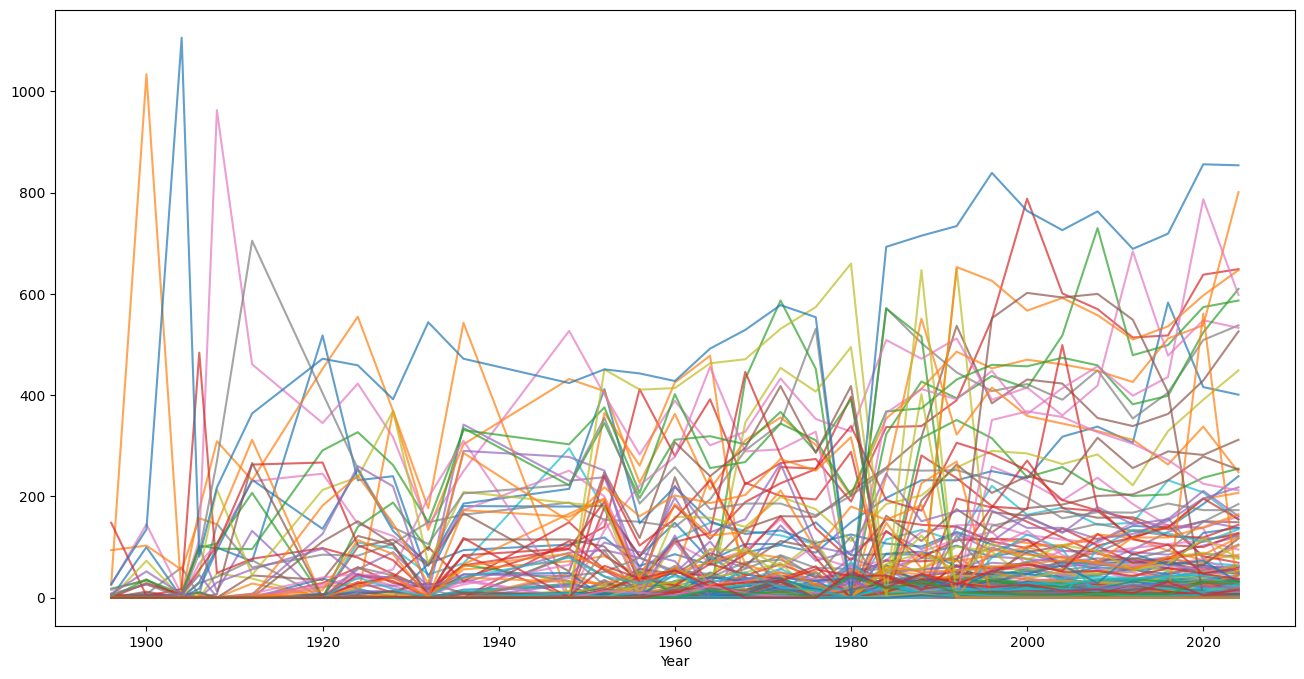

In [3]:
athletes_data = athletes.drop_duplicates()
athlete_counts = athletes_data.groupby(['Year', 'NOC']).size().reset_index(name='Athlete_Count')
athlete_pivot_data = athlete_counts.pivot(index='Year', columns='NOC', values='Athlete_Count').fillna(0)

# Plot each country's line
athlete_pivot_data.plot(figsize=(16, 8), legend=False, alpha=0.7)

athlete_pivot_data

predicted=650.590, expected=715.000
predicted=256.326, expected=734.000
predicted=108.158, expected=839.000
predicted=271.165, expected=764.000
predicted=658.842, expected=726.000
predicted=768.909, expected=763.000
predicted=774.776, expected=689.000
predicted=761.407, expected=719.000
predicted=752.466, expected=856.000
predicted=729.724, expected=854.000
Test RMSE: 323.914


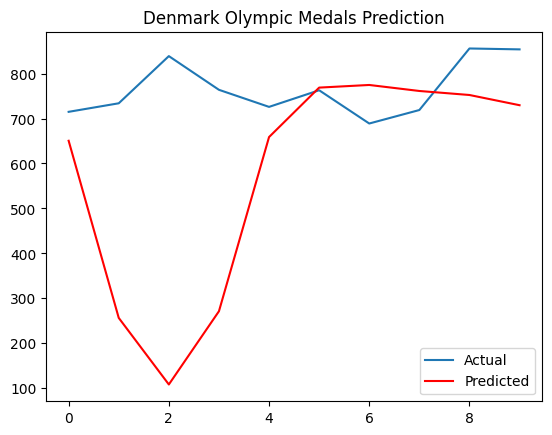

In [34]:
series = athlete_pivot_data['USA']
# split into train and test sets
X = series.values
train_size = int(len(X) * 0.70)
train, test = X[:train_size], X[train_size:]
history = list(train)
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))  # ARIMA(p=5, d=1, q=0)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={yhat:.3f}, expected={obs:.3f}')

# evaluate rmse
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

# plot forecasts against actual outcomes
plt.clf()
plt.plot(test, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.legend()
plt.title("Denmark Olympic Medals Prediction")
plt.show()


In [25]:
import pandas as pd
data = pd.read_csv('finalData.csv',index_col=0)
data = data.fillna(0)
data

,NOC,Year,Medal,Event_Count,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,Male_Percentage,is_Host?
0,AFG,1936,0,4,0,0,0,0,0,0,0,0,0,100.000000,0.0
1,AFG,1948,0,2,0,0,0,0,0,0,0,0,0,100.000000,0.0
2,AFG,1956,0,1,0,0,0,0,0,0,0,0,0,100.000000,0.0
3,AFG,1960,0,13,0,0,0,0,0,0,0,0,0,100.000000,0.0
4,AFG,1964,0,8,0,0,0,0,0,0,0,0,0,100.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,ZIM,2008,9,15,0,0,0,0,0,9,0,0,0,50.000000,0.0
3255,ZIM,2012,0,8,0,0,0,0,0,0,0,0,0,44.444444,0.0
3256,ZIM,2016,0,13,0,0,0,0,0,0,0,0,0,29.032258,0.0
3257,ZIM,2020,0,5,0,0,0,0,0,0,0,0,0,80.000000,0.0


In [22]:
def timeSeries(noc, col):
    """
    Extracts a time series for a specific NOC (country) and a specified column.

    Parameters:
    - noc (str): The National Olympic Committee (NOC) code to filter by.
    - col (str): The column name whose values are to be extracted as a time series.

    Returns:
    - pd.Series: A time series indexed by year with the values from the specified column.
    """
    # Filter the data for the specified NOC
    filtered_data = data[data['NOC'] == noc]
    
    # Extract the time series
    if col in filtered_data.columns:
        time_series = filtered_data[['Year', col]].set_index('Year')
        return time_series
    else:
        raise ValueError(f"Column '{col}' does not exist in the dataset.")

# Example usage of the function for NOC "AFG" and column "Medal"
example_time_series = timeSeries("AFG", "Male_Percentage")
example_time_series

,Male_Percentage
Year,
1936,100.000000
1948,100.000000
1956,100.000000
1960,100.000000
1964,100.000000
1968,100.000000
1972,100.000000
1980,100.000000
1988,100.000000


In [27]:

def checkParam(p, d, q, noc, factor): 
    series = timeSeries(noc, factor)
    # split into train and test sets
    X = series.values
    train_size = int(len(X) * 0.70)
    train, test = X[:train_size], X[train_size:]
    history = list(train)
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=(p, d, q))  # ARIMA(p=5, d=1, q=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        #print(f'predicted={yhat:.3f}, expected={obs:.3f}')
    # evaluate rmse
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


for p in range(10):
    for d in range(10):
        for r in range(10):
            sum = 0.0
            params = [-1, -1, -1]
            minsum  = 1000000000000000000000
            for factor in data.columns:
                if(factor == "isHost?"):
                    continue
                for noc in data["NOC"].drop_duplicates():
                    sum += checkParam(p,d,r,noc,factor)
            if (sum<minSum):
                minSum = sum
                params = [p,d,r]
print(params)

#checkParam(5,1,1, 'CHN', "Male_Percentage")

            

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''